# Pymaceuticals  |  Week 5 Matplotlib HW  |  Monteiro Analysis

## Action Items

## ====================

* Creating a scatter plot that shows how the tumor volume changes over time for each treatment.
* Creating a scatter plot that shows how the number of [metastatic](https://en.wikipedia.org/wiki/Metastasis) (cancer spreading) sites changes over time for each treatment.
* Creating a scatter plot that shows the number of mice still alive through the course of treatment (Survival Rate)
* Creating a bar graph that compares the total % tumor volume change for each drug across the full 45 days.


## Pre-work
## ====================

### Dependencies and Setup

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd
import numpy as np
from scipy import stats


### Hide warning messages in notebook

In [2]:
import warnings
warnings.filterwarnings('ignore')

### File to Load (Remember to Change These)

In [3]:
mouse_drug_data = "data/mouse_drug_data.csv"
clinical_trial_data = "data/clinicaltrial_data.csv"

### Read the Mouse and Drug Data

In [4]:
mouse_drug_df = pd.read_csv(mouse_drug_data)
mouse_drug_df.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


### Read the Clinical Trial Data

In [5]:
clinical_trial_df = pd.read_csv(clinical_trial_data)
clinical_trial_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


## Combine the data into a single dataset  // Display the data table for preview
## ====================

In [6]:
mouse_clinical_mouse_drugtrial = mouse_drug_df.merge(clinical_trial_df, on='Mouse ID')
mouse_clinical_mouse_drugtrial = mouse_clinical_mouse_drugtrial.sort_values(by=['Mouse ID', 'Timepoint'])
mouse_clinical = mouse_clinical_mouse_drugtrial[['Mouse ID', 'Timepoint','Tumor Volume (mm3)', 'Metastatic Sites', 'Drug']]
mouse_clinical_rnd = mouse_clinical.round({'Tumor Volume (mm3)':1})
mouse_clinical_rnd.head(15)
# mouse_clinical_mouse_drugtrial['Mouse ID'].value_counts()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
926,a203,0,45.0,0,Infubinol
927,a203,5,48.5,0,Infubinol
928,a203,10,51.9,1,Infubinol
929,a203,15,52.8,1,Infubinol
930,a203,20,55.2,1,Infubinol
931,a203,25,56.8,1,Infubinol
932,a203,30,59.5,1,Infubinol
933,a203,35,61.9,2,Infubinol
934,a203,40,63.6,2,Infubinol
935,a203,45,68.0,2,Infubinol


## Tumor Response to Treatment (By Volume)
## ====================

* Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 

* Convert to DataFrame

* Preview DataFrame

#### Minor Data Munging to Re-Format the Data Frames

* Preview that Reformatting worked


In [7]:
mouse_clinical_bydrug_timepoint = mouse_clinical_rnd.groupby(by=['Drug','Timepoint']).mean()
tumorplot_mean = mouse_clinical_bydrug_timepoint.drop(columns=['Metastatic Sites'])
tumorplot_mean = tumorplot_mean.unstack(0)
tumorplot_mean = tumorplot_mean.reset_index()['Tumor Volume (mm3)']
tumorplot_mean


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
1,44.268000,46.504762,47.076000,47.400000,46.791304,47.133333,47.256000,43.948000,47.528000,46.850000
2,43.080000,48.290000,49.409524,49.577273,48.700000,49.416667,49.095652,42.533333,49.465217,48.686364
3,42.066667,50.089474,51.290476,52.400000,50.933333,51.360000,51.070588,41.495833,51.534783,50.780952
4,40.717391,52.150000,53.195000,54.926316,53.640000,54.357895,53.341176,40.234783,54.076190,53.170588
5,39.945455,54.288889,55.722222,57.684211,56.722222,57.476471,55.485714,38.978261,56.163158,55.450000
6,38.781818,56.762500,58.300000,60.994444,59.560000,59.806667,58.200000,38.700000,59.827778,57.713333
7,37.822727,58.828571,60.725000,63.370588,62.673333,62.428571,60.360000,37.447619,62.443750,60.085714
8,36.961905,61.471429,63.160000,66.066667,65.600000,65.050000,63.044444,36.585000,65.358333,62.914286
9,36.233333,64.115385,65.755556,70.672727,69.276923,68.072727,66.271429,34.960000,68.436364,65.957143


## Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
## ==========================

* Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint

* Convert to DataFrame

* Preview DataFrame

* Minor Data Munging to Re-Format the Data Frames

* Preview that Reformatting worked

In [8]:
bydrug_timepoint_sem = mouse_clinical_rnd.groupby(['Drug','Timepoint']).sem()
bydrug_timepoint_sem = bydrug_timepoint_sem.drop(columns=['Metastatic Sites', 'Mouse ID'])
tumorplot_sem = bydrug_timepoint_sem.unstack(0)['Tumor Volume (mm3)']
tumorplot_sem = tumorplot_sem.reset_index()
tumorplot_sem

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,5,0.449137,0.164096,0.235533,0.266584,0.201272,0.216834,0.233172,0.485356,0.240175,0.189584
2,10,0.704036,0.234734,0.283339,0.356324,0.321307,0.400980,0.377399,0.719240,0.433280,0.263944
3,15,0.837107,0.334288,0.352805,0.577249,0.444669,0.612733,0.466272,0.770151,0.493940,0.367334
4,20,0.908820,0.356109,0.476416,0.725309,0.594510,0.839567,0.554597,0.787014,0.619751,0.533493
5,25,0.884443,0.440505,0.551502,0.756580,0.812788,1.032862,0.578541,0.747220,0.744344,0.605117
6,30,0.933820,0.492686,0.627788,0.935833,0.972175,1.221415,0.745671,0.863946,0.897083,0.802963
7,35,1.052804,0.690551,0.983587,1.128533,1.013972,1.287660,1.087627,0.967068,1.008091,0.877675
8,40,1.223684,0.708305,1.052215,1.156912,1.119566,1.372484,1.569953,1.128629,1.409248,0.998067
9,45,1.226053,0.900630,1.144444,1.453966,1.419288,1.356539,1.896327,1.224324,1.577701,1.001631


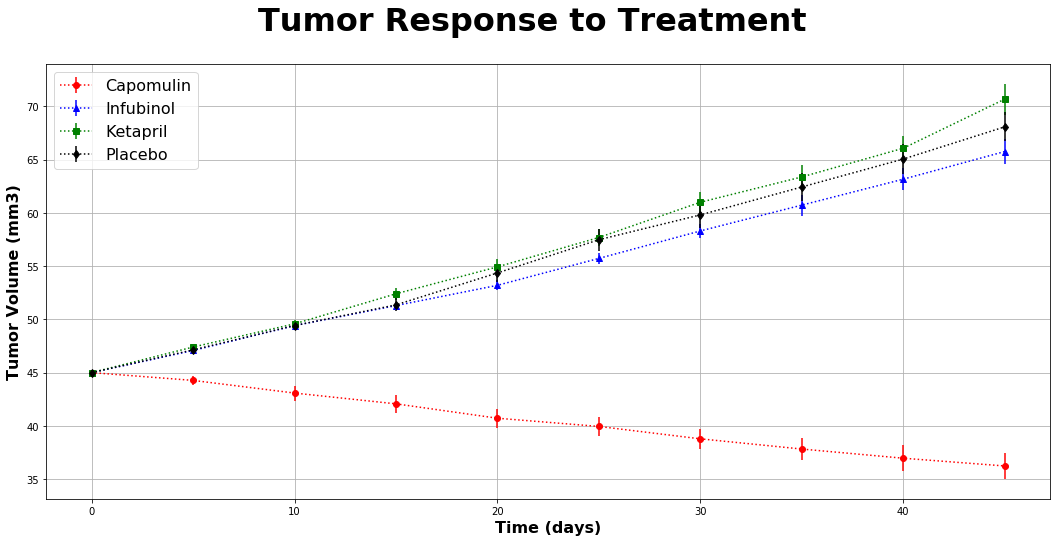

In [25]:
fig, ax, = plt.subplots()
fig.suptitle("Tumor Response to Treatment", fontsize=32, fontweight="bold")
fig.set_size_inches(18, 8)

plt.errorbar(tumorplot_sem['Timepoint'], tumorplot_mean['Capomulin'], 
               yerr=tumorplot_sem['Capomulin'], fmt='o', color='r', linestyle =':', capsize=None, 
            )

plt.errorbar(tumorplot_sem['Timepoint'], tumorplot_mean['Infubinol'], 
               yerr=tumorplot_sem['Infubinol'], fmt='^', color='b', linestyle =':', capsize=None, 
            )

plt.errorbar(tumorplot_sem['Timepoint'], tumorplot_mean['Ketapril'], 
               yerr=tumorplot_sem['Ketapril'], fmt='s', color='g', linestyle =':', capsize=None, 
            )

plt.errorbar(tumorplot_sem['Timepoint'], tumorplot_mean['Placebo'], 
               yerr=tumorplot_sem['Placebo'], fmt='d', color='k', linestyle =':', capsize=None, 
            )

plt.legend(loc="best", fontsize="16", fancybox=True)

ax.grid()
ax.set_xlabel('Time (days)', fontsize=16, fontweight="bold")
ax.set_ylabel('Tumor Volume (mm3)', fontsize=16, fontweight="bold")
fig.show()
fig.savefig('report_graphics/tumor_response.png', dpi=None, transparent=False,)

## Metastatic Response to Treatment (By Number of Sites)
## ====================

* Store the Mean Met. Site Data Grouped by Drug and Timepoint

* Convert to DataFrame

* Preview DataFrame

#### Minor Data Munging to Re-Format the Data Frames

* Preview that Reformatting worked


In [10]:
sitesplot_mean = mouse_clinical_bydrug_timepoint.drop(columns=['Tumor Volume (mm3)'])
sitesplot_mean = sitesplot_mean.unstack(0)
sitesplot_mean = sitesplot_mean.reset_index()['Metastatic Sites']
sitesplot_mean

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
2,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
3,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
4,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
5,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
6,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
7,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
8,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714
9,1.476190,2.692308,2.111111,3.363636,2.538462,3.272727,2.571429,1.250000,1.727273,3.071429


#### Standard Error of Met. Sites by drug and timepoint

* Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

* Convert to DataFrame

* Preview DataFrame

#### Minor Data Munging to Re-Format the Data Frames

* Preview that Reformatting worked


In [11]:
sitesplot_sem = mouse_clinical_rnd.groupby(by=['Drug','Timepoint']).sem()
sitesplot_sem = sitesplot_sem.drop(columns=['Tumor Volume (mm3)', 'Mouse ID'])
sitesplot_sem = sitesplot_sem.unstack(0)['Metastatic Sites']
sitesplot_sem = sitesplot_sem.reset_index()
sitesplot_sem

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
2,10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
3,15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
4,20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378
5,25,0.181818,0.258831,0.265753,0.288275,0.185240,0.263888,0.199095,0.119430,0.219824,0.236621
6,30,0.172944,0.249479,0.227823,0.347467,0.266667,0.300264,0.266469,0.139968,0.230641,0.248168
7,35,0.169496,0.266526,0.224733,0.361418,0.330464,0.341412,0.366667,0.145997,0.240983,0.285714
8,40,0.175610,0.289128,0.314466,0.315725,0.321702,0.297294,0.433903,0.160591,0.312815,0.299791
9,45,0.202591,0.286101,0.309320,0.278722,0.351104,0.304240,0.428571,0.190221,0.359062,0.286400


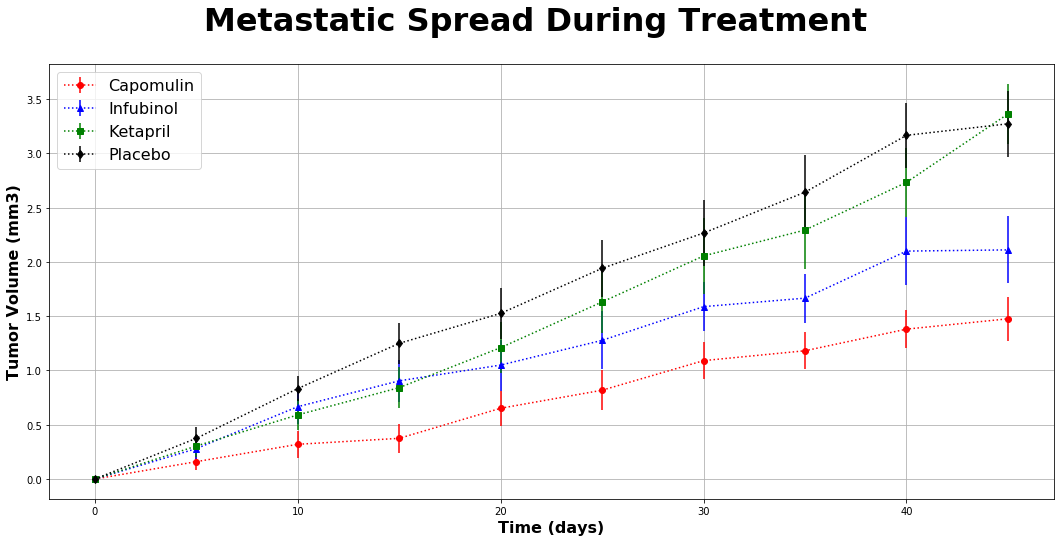

In [26]:
fig, ax, = plt.subplots()
fig.suptitle("Metastatic Spread During Treatment", fontsize=32, fontweight="bold")
fig.set_size_inches(18, 8)

plt.errorbar(sitesplot_sem['Timepoint'], sitesplot_mean['Capomulin'], 
               yerr=sitesplot_sem['Capomulin'], fmt='o', color='r', 
               linestyle =':', capsize=None, 
            )

plt.errorbar(sitesplot_sem['Timepoint'], sitesplot_mean['Infubinol'], 
               yerr=sitesplot_sem['Infubinol'], fmt='^', color='b', 
               linestyle =':', capsize=None, 
            )

plt.errorbar(sitesplot_sem['Timepoint'], sitesplot_mean['Ketapril'], 
               yerr=sitesplot_sem['Ketapril'], fmt='s', color='g', 
               linestyle =':', capsize=None, 
            )

plt.errorbar(sitesplot_sem['Timepoint'], sitesplot_mean['Placebo'], 
               yerr=sitesplot_sem['Placebo'], fmt='d', color='k', 
               linestyle =':', capsize=None, 
            )

plt.legend(loc="best", fontsize="16", fancybox=True)

ax.grid()
ax.set_xlabel('Time (days)', fontsize=16, fontweight="bold")
ax.set_ylabel('Tumor Volume (mm3)', fontsize=16, fontweight="bold")
fig.show()
fig.savefig('report_graphics/metastatic_spread.png', dpi=None, transparent=False,)

## Mouse Survival Rates over Timeperiod
## ====================

* Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

* Convert to DataFrame

* Preview DataFrame

#### Minor Data Munging to Re-Format the Data Frames

* Preview that Reformatting worked

In [13]:
mouseplot_count = mouse_clinical_rnd.groupby(by=['Drug','Timepoint']).count()
mouseplot_count = mouseplot_count.drop(columns=['Metastatic Sites', 'Tumor Volume (mm3)'])
mouseplot_count = mouseplot_count.unstack(0)
mouseplot_count = mouseplot_count.reset_index()['Mouse ID']
times = mouseplot_count.index.tolist()
timepoints = pd.DataFrame(times)
mouseplot_count.insert(loc=0, column='Timepoint', value=(timepoints[0] * 5))
mouseplot_count

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,25,25,25,25,25,25,26,25,26,25
1,5,25,21,25,23,23,24,25,25,25,24
2,10,25,20,21,22,21,24,23,24,23,22
3,15,24,19,21,19,21,20,17,24,23,21
4,20,23,18,20,19,20,19,17,23,21,17
5,25,22,18,18,19,18,17,14,23,19,16
6,30,22,16,17,18,15,15,13,23,18,15
7,35,22,14,12,17,15,14,10,21,16,14
8,40,21,14,10,15,15,12,9,20,12,14
9,45,21,13,9,11,13,11,7,20,11,14


### Side Quest to Practice: Mortality Rate by Drug as Table

In [14]:
mouse_start = mouseplot_count.iloc[0, :]
mouse_survive = mouseplot_count.iloc[9, :]
mouse_alive = pd.DataFrame(mouse_start)
mouse_stillalive = pd.DataFrame(mouse_survive)
mouse_mortality = mouse_alive.merge(mouse_stillalive, on='Drug')
mouse_mortality = mouse_mortality.reset_index()
mouse_mortality = mouse_mortality.rename(columns = {0:'Start',9:'Survived'})
mouse_mortality = mouse_mortality.drop([0])
mouse_mortality["Mortality Rate"] = ((mouse_mortality["Survived"] / mouse_mortality["Start"])*100)
mouse_mortality["Mortality Rate"] = mouse_mortality["Mortality Rate"].map("{:,.2f}%".format)
mouse_mortality = mouse_mortality.sort_values(["Mortality Rate"], ascending=False)
mouse_mortality

,Drug,Start,Survived,Mortality Rate
1,Capomulin,25,21,84.00%
8,Ramicane,25,20,80.00%
10,Zoniferol,25,14,56.00%
2,Ceftamin,25,13,52.00%
5,Naftisol,25,13,52.00%
4,Ketapril,25,11,44.00%
6,Placebo,25,11,44.00%
9,Stelasyn,26,11,42.31%
3,Infubinol,25,9,36.00%
7,Propriva,26,7,26.92%


#### Plotting Mouse Survival Rates

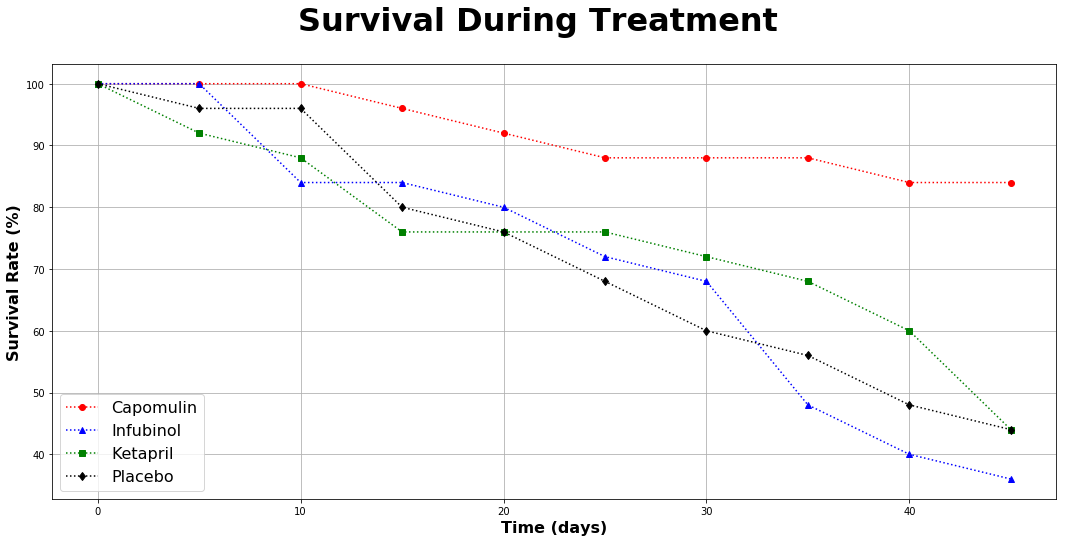

In [27]:
fig, ax, = plt.subplots()
fig.suptitle("Survival During Treatment", fontsize=32, fontweight="bold")
fig.set_size_inches(18, 8)

plt.plot(mouseplot_count['Timepoint'], ((mouseplot_count['Capomulin'] / 25)*100), # 
         linestyle=":", marker="o", color='red',
            )

plt.plot(mouseplot_count['Timepoint'], ((mouseplot_count['Infubinol'] / 25)*100), 
         linestyle=":", marker="^", color='blue',
            )

plt.plot(mouseplot_count['Timepoint'], ((mouseplot_count['Ketapril'] / 25)*100), 
         linestyle=":", marker="s", color='green',
            )

plt.plot(mouseplot_count['Timepoint'], ((mouseplot_count['Placebo'] / 25)*100), 
         linestyle=":", marker="d", color='black',
            )

plt.legend(loc="lower left", fontsize="16", fancybox=True)

ax.grid()
ax.set_xlabel('Time (days)', fontsize=16, fontweight="bold")
ax.set_ylabel('Survival Rate (%)', fontsize=16, fontweight="bold")
fig.show()
fig.savefig('report_graphics/treatment_survival_rates.png', dpi=None, transparent=False,)

## Summary Bar Graph

#### Here's the dataset we're going to manipulate ↓

In [16]:
tumorplot_mean

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
1,44.268000,46.504762,47.076000,47.400000,46.791304,47.133333,47.256000,43.948000,47.528000,46.850000
2,43.080000,48.290000,49.409524,49.577273,48.700000,49.416667,49.095652,42.533333,49.465217,48.686364
3,42.066667,50.089474,51.290476,52.400000,50.933333,51.360000,51.070588,41.495833,51.534783,50.780952
4,40.717391,52.150000,53.195000,54.926316,53.640000,54.357895,53.341176,40.234783,54.076190,53.170588
5,39.945455,54.288889,55.722222,57.684211,56.722222,57.476471,55.485714,38.978261,56.163158,55.450000
6,38.781818,56.762500,58.300000,60.994444,59.560000,59.806667,58.200000,38.700000,59.827778,57.713333
7,37.822727,58.828571,60.725000,63.370588,62.673333,62.428571,60.360000,37.447619,62.443750,60.085714
8,36.961905,61.471429,63.160000,66.066667,65.600000,65.050000,63.044444,36.585000,65.358333,62.914286
9,36.233333,64.115385,65.755556,70.672727,69.276923,68.072727,66.271429,34.960000,68.436364,65.957143


#### Calculating change in tumor size by drug // then previewing as a data frame

In [17]:
tumorsize_start = tumorplot_mean.iloc[0, :]
tumorsize_end = tumorplot_mean.iloc[9, :]
tumorsize_start = pd.DataFrame(tumorsize_start)
tumorsize_end = pd.DataFrame(tumorsize_end)
tumorsize_change = tumorsize_start.merge(tumorsize_end, on='Drug')
tumorsize_change = tumorsize_change.reset_index()
tumorsize_change_format = tumorsize_change.rename(columns = {0:'Start',9:'End'})
tumorsize_change_format["Tumor Size \u0394"] = (-((1 - (tumorsize_change_format["End"] / tumorsize_change_format["Start"]))*100))
tumorsize_change_format["Tumor Size \u0394"] = tumorsize_change_format["Tumor Size \u0394"].map("{:,.1f}%".format)
tumorsize_change_format["End"] = tumorsize_change_format["End"].map("{:,.1f}".format)
tumorsize_change_format = tumorsize_change_format.sort_values(["Tumor Size \u0394"], ascending=True)
# tumorsize_change_format = tumorsize_change_format.drop(columns=['Start', 'End'])  # I prefer the extra columns, but you could add the comment to more closely mirror the example
tumorsize_change_t = tumorsize_change_format.transpose()
drugname = tumorsize_change_t.iloc[0]
tumorsize_change_t = tumorsize_change_t[1:]
tumorsize_change_t.columns = drugname
tumorsize_change_t

Drug,Capomulin,Ramicane,Ceftamin,Infubinol,Zoniferol,Propriva,Placebo,Stelasyn,Naftisol,Ketapril
Start,45,45,45,45,45,45,45,45,45,45
End,36.2,35.0,64.1,65.8,66.0,66.3,68.1,68.4,69.3,70.7
Tumor Size Δ,-19.5%,-22.3%,42.5%,46.1%,46.6%,47.3%,51.3%,52.1%,53.9%,57.1%


#### Drilling down to the releveant results

In [18]:
tumorsize_change
tumorsize_change_noformat = tumorsize_change.rename(columns = {0:'Start',9:'End'})
tumorsize_change_noformat["Tumor Size \u0394"] = (-((1 - (tumorsize_change_noformat["End"] / tumorsize_change_noformat["Start"]))*100))
tumorsize_change_noformat = tumorsize_change_noformat.drop(columns = ['Start','End'])
tumorsize_change_nf_t = tumorsize_change_noformat.transpose()
drugname_nf = tumorsize_change_nf_t.iloc[0]
tumorsize_change_nf_t = tumorsize_change_nf_t[1:]
tumorsize_change_nf_t.columns = drugname_nf
relevant_results = tumorsize_change_nf_t[['Capomulin','Infubinol','Ketapril','Placebo']]



* Store all Relevant Percent Changes into a Tuple


* Splice the data between passing and failing drugs


* Orient widths. Add labels, tick marks, etc. 


* Use functions to label the percentages of changes


* Call functions to implement the function calls


* Save the Figure


* Show the Figure


In [19]:
relevant_results

Drug,Capomulin,Infubinol,Ketapril,Placebo
Tumor Size Δ,-19.4815,46.1235,57.0505,51.2727


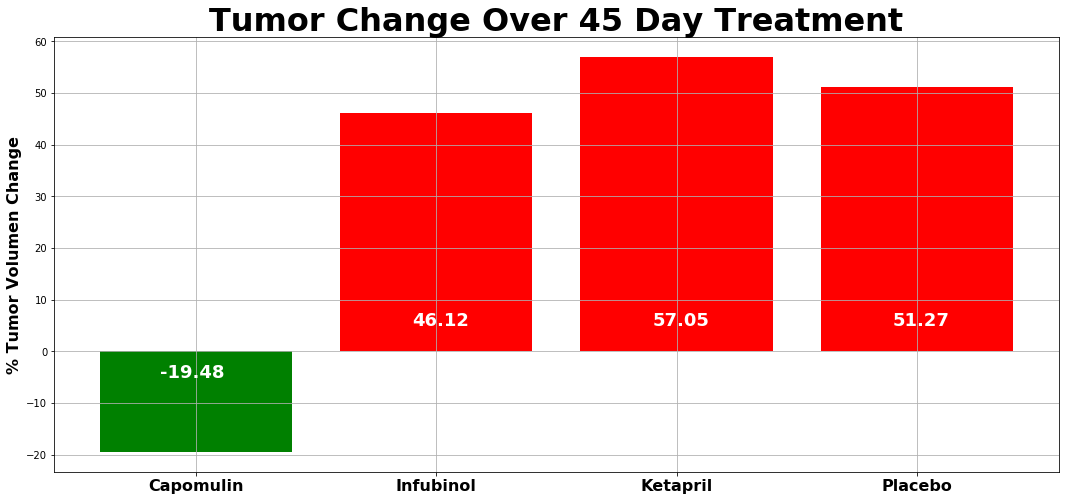

In [28]:
# tumorsize_change
drugs = list(relevant_results.columns.values)
drugs

drug_results = relevant_results.iloc[0]
drug_results

fig, ax, = plt.subplots()
plt.bar(drugs[0], drug_results[0], color="green")
plt.bar(drugs[1:4], drug_results[1:4], color="red")
fig.set_size_inches(18, 8)
plt.ylabel('% Tumor Volumen Change', fontsize=16, fontweight="bold")
plt.title('Tumor Change Over 45 Day Treatment', fontsize=32, fontweight="bold")
plt.xticks(fontsize=16, fontweight="bold")
ax.text(-.15, -5, round(drug_results[0], 2), color="white", fontsize="18", fontweight="bold")
ax.text(.9, 5, round(drug_results[1], 2), color="white", fontsize="18", fontweight="bold")
ax.text(1.9, 5, round(drug_results[2], 2), color="white", fontsize="18", fontweight="bold")
ax.text(2.9, 5, round(drug_results[3], 2), color="white", fontsize="18", fontweight="bold")
ax.grid()
fig.show()
fig.savefig('report_graphics/tumorsize_change.png', dpi=None, transparent=False,)

### For the visually impaired

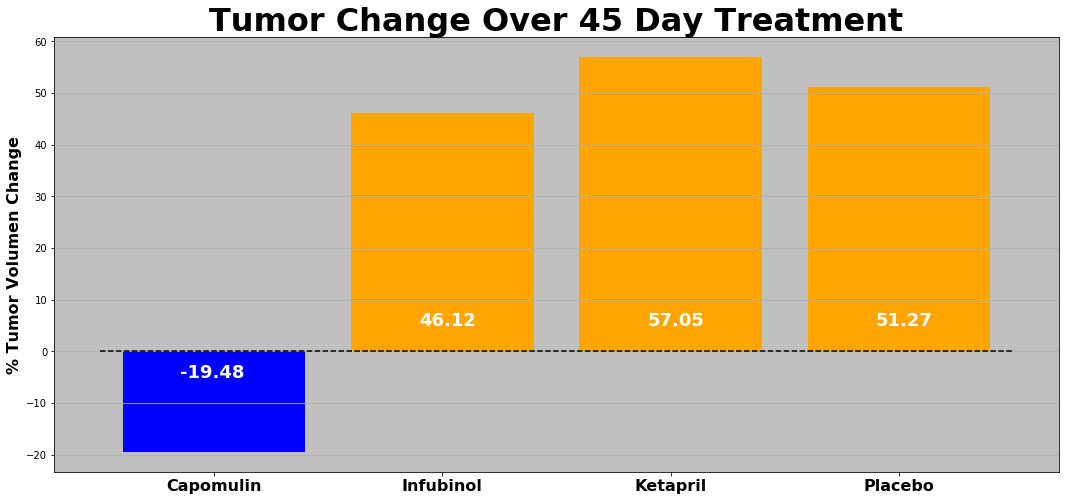

In [29]:
# tumorsize_change
drugs = list(relevant_results.columns.values)
drugs

drug_results = relevant_results.iloc[0]
drug_results

fig, ax, = plt.subplots()
plt.bar(drugs[0], drug_results[0], color="blue")
plt.bar(drugs[1:4], drug_results[1:4], color="orange")
fig.set_size_inches(18, 8)
plt.ylabel('% Tumor Volumen Change', fontsize=16, fontweight="bold")
plt.title('Tumor Change Over 45 Day Treatment', fontsize=32, fontweight="bold")
plt.xticks(fontsize=16, fontweight="bold")
ax.text(-.15, -5, round(drug_results[0], 2), color="white", fontsize="18", fontweight="bold")
ax.text(.9, 5, round(drug_results[1], 2), color="white", fontsize="18", fontweight="bold")
ax.text(1.9, 5, round(drug_results[2], 2), color="white", fontsize="18", fontweight="bold")
ax.text(2.9, 5, round(drug_results[3], 2), color="white", fontsize="18", fontweight="bold")
ax.yaxis.grid()
threshold = 0
ax.plot([-.5, 3.5], [threshold, threshold], "k--")
ax.set_facecolor('silver')
fig.show()
fig.savefig('report_graphics/tumorsize_change_cb.png', dpi=None, transparent=False,)